In [17]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import time
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.image as mpimg
from scipy.ndimage import filters
import urllib
from numpy import random
import sys
import pickle
import os
from scipy.io import loadmat
# Load the MNIST digit data
M = loadmat("mnist_all.mat")

In [18]:
def softmax(y):
    '''Return the output of the softmax function for the matrix of output y. y
    is an NxM matrix where N is the number of outputs for a single case, and M
    is the number of cases'''
    return exp(y) / tile(sum(exp(y), 0), (len(y), 1))
def cost_function(y, p):
    return -np.nansum(y * np.log(p))

In [19]:
def part2(x, W0, b0):
    #print(b0.shape, W0.shape)
    total_W0 = np.concatenate((b0, W0))
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    vals = softmax(np.dot(total_W0.T, total_x))
    return vals.T

def part3(x, y1, p):
    deriv = np.subtract(p, y1)
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    deriv = np.matmul(deriv.T, total_x.T).T
    return deriv  # shape 10, 785

In [20]:
def get_data(M):
    train_keys = [key for key in M.keys() if "train" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        #print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y

In [21]:
x, y = get_data(M)
x = x.T/255./255.

In [22]:
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
weights[0, :10]

(784, 10) (1, 10)


array([ -38777.32657475,   18848.74641025,   18880.67087225,
        -25182.61725858,    4488.18470293,  157890.47519916,
         -6992.08525269,   68297.0895211 , -176555.85615698,
        -20987.28146269])

In [23]:
ind1 = 300
ind2 = 400
fine_grain = 30
print(weights[ind1, 5], weights[ind2, 5])
range_val = 150.
vary_w1 = np.linspace(weights[ind1, 5]- range_val, weights[ind1, 5]+range_val, fine_grain*2)
vary_w2 = np.linspace(weights[ind2, 5]- range_val, weights[ind2, 5]+range_val, fine_grain*2)
print(vary_w1, vary_w2)

-53.8328914456 4.80312600592
[-203.83289145 -198.74814568 -193.66339992 -188.57865416 -183.49390839
 -178.40916263 -173.32441687 -168.23967111 -163.15492534 -158.07017958
 -152.98543382 -147.90068806 -142.81594229 -137.73119653 -132.64645077
 -127.561705   -122.47695924 -117.39221348 -112.30746772 -107.22272195
 -102.13797619  -97.05323043  -91.96848467  -86.8837389   -81.79899314
  -76.71424738  -71.62950162  -66.54475585  -61.46001009  -56.37526433
  -51.29051856  -46.2057728   -41.12102704  -36.03628128  -30.95153551
  -25.86678975  -20.78204399  -15.69729823  -10.61255246   -5.5278067
   -0.44306094    4.64168483    9.72643059   14.81117635   19.89592211
   24.98066788   30.06541364   35.1501594    40.23490516   45.31965093
   50.40439669   55.48914245   60.57388822   65.65863398   70.74337974
   75.8281255    80.91287127   85.99761703   91.08236279   96.16710855] [-145.19687399 -140.11212823 -135.02738247 -129.94263671 -124.85789094
 -119.77314518 -114.68839942 -109.60365366 -104.

In [24]:
start = time.time()
contour = np.zeros((fine_grain*2, fine_grain*2))
for i in range(fine_grain*2):
    for j in range(fine_grain*2):
        weights[ind1, 5] = vary_w1[i]
        weights[ind2, 5] = vary_w2[j]
        output2 = part2(x, weights, weights_bias)
        cost2 = cost_function(y, output2)     
        contour[i, j] = cost2
    if (i%10 ==9):
        print(i)
end = time.time()
print("Time taken: {0}".format(end - start))
np.savetxt("new_big_contour.txt", contour)

9
19
29
39
49
59
Time taken: 852.577112197876


In [25]:
def df(x, W0, y):
    # this W0 is assumed to have the bias incorperated into it
    #print(W0.shape, y.shape)
    W1, b0 = W0[:-1, :].reshape(784, W0.shape[1]), W0[-1, :].reshape(1, 10)
    vals = part2(x, W1, b0)
    return part3(x, y, vals)

(60,) (60, 60)


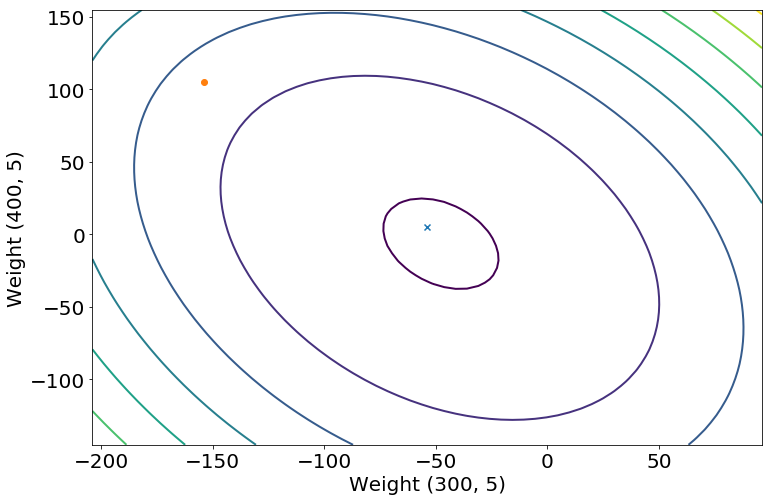

In [36]:
matplotlib.rcParams.update({'font.size': 20})

#reload teh weights here, they get overwritten
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
#print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
#weights[0, :10]

contour = np.loadtxt("new_big_contour.txt")
print(vary_w1.shape, contour.shape )
plt.figure(figsize=(12, 8))
plt.contour(vary_w1, vary_w2, contour, linewidths = 2, cmap = "viridis")
plt.xlabel("Weight ({0}, 5)".format(ind1))
plt.ylabel("Weight ({0}, 5)".format(ind2))
#plt.scatter()
plt.scatter(weights[ind1, 5], weights[ind2, 5], marker = "x", label = "Found Weights")
plt.legend()
#plt.scatter(weights[ind1, 5]-100, weights[ind2, 5]+100)

plt.show()

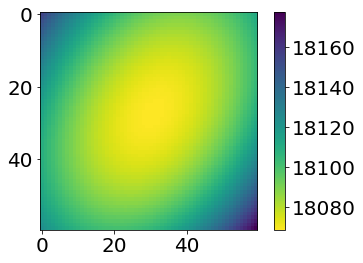

In [32]:
#print(contour)
plt.scatter(weights[ind1, 5], weights[ind2, 5])
plt.imshow(contour, cmap = "viridis_r")
plt.colorbar()
plt.show()

-59.8912733933 2.41672151099
-59.9347540397 2.45003890696
-59.9659669149 2.49444246752
-59.9864773378 2.54801755346
-59.9977168734 2.60918575991
Iter 5
Time taken: 2.0284416675567627
[-153.83289145  -59.89127339  -59.93475404  -59.96596691  -59.98647734
  -59.99771687]
[-95.19687399   2.41672151   2.45003891   2.49444247   2.54801755
   2.60918576]


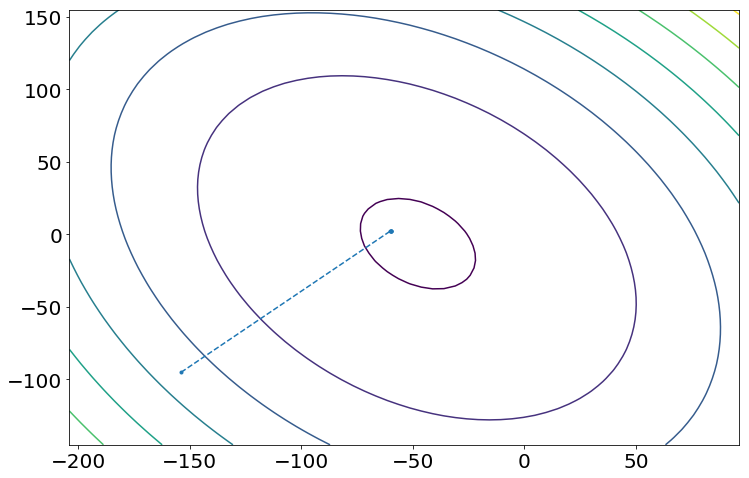

In [70]:
#use vanilla gradient descent
def grad_descent_learning_curves(df, x, y, weights, b0, alpha, ind1, ind2, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] -=100
    W0[ind2 , 5] -=100
    #print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 5
    iter = 0

    weight1= np.zeros(max_iter+1)
    weight2 = np.zeros(max_iter+1)
    #print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        #print(counter)
        temp = alpha * df(x, W1, y)
        #print(temp.shape)
        #print(temp[ind1, 5], temp[ind2, 5])
        #print(temp.shape)
        #W1[ind1 +1, 5] -= temp[ind1+1, 5]
        #W1[ind2 +1, 5] -= temp[ind2+1, 5]
        W1 -=temp
        weight1[counter] = W1[ind1, 5]
        weight2[counter] = W1[ind2, 5]
        print(W1[ind1, 5], W1[ind2, 5])
        counter +=1
        #if iter % 100 == 99:
        #    print("Iter", iter)   
        iter += 1
        #break
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2
    


np.random.seed(0)
alpha = .15
final_weights, weight1, weight2 = grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 1e-4)
print(weight1)
print(weight2)

#print(weights[ind1, 5])
plt.figure(figsize=(12, 8))
plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='--', marker='.',)
plt.show()

In [89]:
def momemtum_grad_descent_learning_curves(df, x, y, W0, b0, alpha, ind1, ind2, momemtum = 0.9, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] -=100
    W0[ind2 , 5] -=100
    print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 10
    iter = 0
    
    weight1= np.zeros(max_iter +1)
    weight2 = np.zeros(max_iter +1)
    print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    
    #counter = 0
    new_momentum = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        new_momentum = momemtum*new_momentum + alpha* df(x, W1, y)
        W1 -= new_momentum
        weight1[counter] = W1[ind1 , 5]
        weight2[counter] = W1[ind2, 5 ]
        counter +=1
        if iter % 100 == 99:
            print("Iter", iter)

        iter += 1
        
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2


np.random.seed(0)
alpha = .15
final_weights, weight3, weight4 = momemtum_grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 0.99, 1e-4)
print(weight3)
print(weight4)

-153.832891446 -95.1968739941
(784, 10)
Iter 10
Time taken: 7.454516410827637
[-153.83289145  -60.88127339  -61.96164944  -63.04965645  -64.11327039
  -65.1185365   -66.03399182  -66.83428914  -67.50256622  -68.03155414
  -68.42380716]
[-95.19687399   1.42672151   0.49965189  -0.36140466  -1.12863667
  -1.77425823  -2.27438648  -2.61191459  -2.77834573  -2.7745821
  -2.61083518]


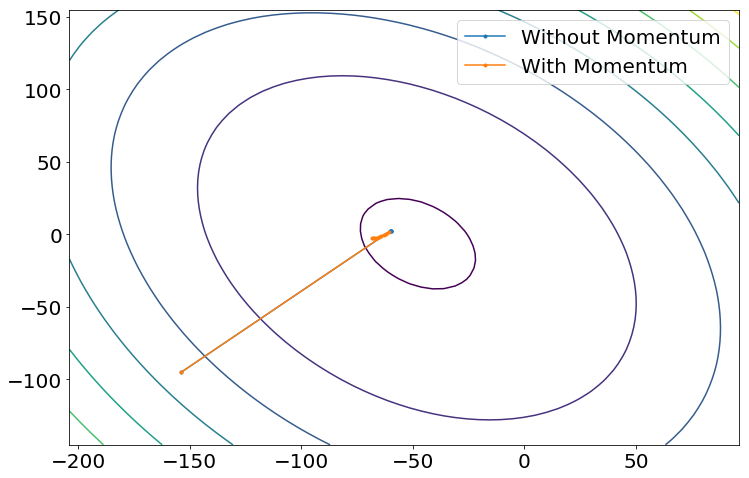

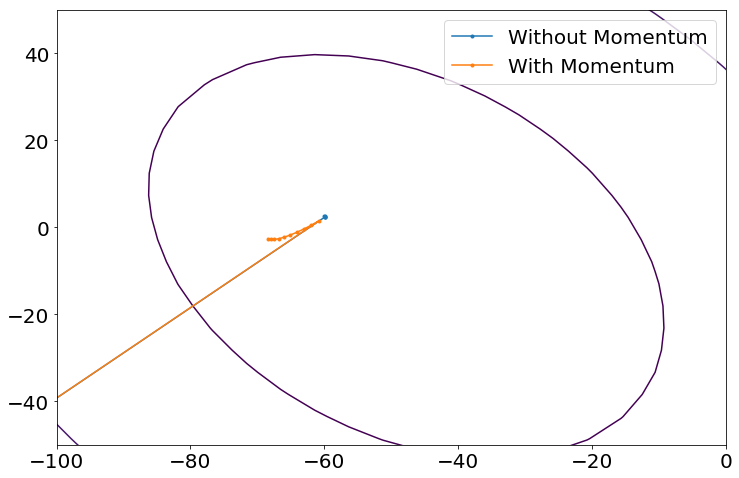

In [90]:
plt.figure(figsize=(12,  8))
plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='-', marker='.', label = "Without Momentum")
plt.plot(weight3, weight4, linestyle='-', marker='.', label = "With Momentum")
plt.legend(numpoints = 1)
plt.show()

plt.figure(figsize=(12,  8))
increments = np.linspace(17000, 18300, 200)
#print(increments)
plt.contour(vary_w1, vary_w2, contour, levels = increments)
plt.plot(weight1, weight2, linestyle='-', marker='.', label = "Without Momentum")
plt.plot(weight3, weight4, linestyle='-', marker='.', label = "With Momentum")
plt.legend(numpoints = 1)
plt.xlim([-100, 0])
plt.ylim([-50, 50])
plt.show()


In [91]:
#find settings that dont work, use a edge point
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
weights[0, :10]

ind1 = 159
ind2 = 160
fine_grain = 30
print(weights[ind1, 5], weights[ind2, 5])
range_val = 150.
vary_w1 = np.linspace(weights[ind1, 5]- range_val, weights[ind1, 5]+range_val, fine_grain*2)
vary_w2 = np.linspace(weights[ind2, 5]- range_val, weights[ind2, 5]+range_val, fine_grain*2)
print(vary_w1, vary_w2)

(784, 10) (1, 10)
11.9165031183 -1.72236062658
[-138.08349688 -132.99875112 -127.91400536 -122.82925959 -117.74451383
 -112.65976807 -107.57502231 -102.49027654  -97.40553078  -92.32078502
  -87.23603925  -82.15129349  -77.06654773  -71.98180197  -66.8970562
  -61.81231044  -56.72756468  -51.64281892  -46.55807315  -41.47332739
  -36.38858163  -31.30383586  -26.2190901   -21.13434434  -16.04959858
  -10.96485281   -5.88010705   -0.79536129    4.28938447    9.37413024
   14.458876     19.54362176   24.62836753   29.71311329   34.79785905
   39.88260481   44.96735058   50.05209634   55.1368421    60.22158786
   65.30633363   70.39107939   75.47582515   80.56057091   85.64531668
   90.73006244   95.8148082   100.89955397  105.98429973  111.06904549
  116.15379125  121.23853702  126.32328278  131.40802854  136.4927743
  141.57752007  146.66226583  151.74701159  156.83175736  161.91650312] [-151.72236063 -146.63761486 -141.5528691  -136.46812334 -131.38337758
 -126.29863181 -121.21388605 -1

In [92]:
start = time.time()
contour = np.zeros((fine_grain*2, fine_grain*2))
for i in range(fine_grain*2):
    for j in range(fine_grain*2):
        weights[ind1, 5] = vary_w1[i]
        weights[ind2, 5] = vary_w2[j]
        output2 = part2(x, weights, weights_bias)
        cost2 = cost_function(y, output2)     
        contour[i, j] = cost2
    if (i%10 ==9):
        print(i)
end = time.time()
print("Time taken: {0}".format(end - start))
np.savetxt("new_big_contour_2.txt", contour)

9
19
29
39
49
59
Time taken: 992.2599413394928


[ 18223.65713064  18218.87873246  18214.17844706  18209.55627046
  18205.0122001   18200.54623492  18196.15837539  18191.84862358
  18187.61698321  18183.46345969]
(60,) (60, 60)


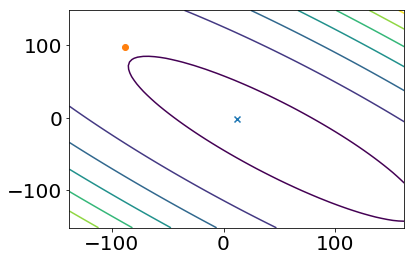

In [93]:
#reload teh weights here, they get overwritten
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
#print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
#weights[0, :10]

contour = np.loadtxt("new_big_contour_2.txt")
print(contour[0, :10])
print(vary_w1.shape, contour.shape)
plt.contour(vary_w1, vary_w2, contour)
#plt.scatter()
plt.scatter(weights[ind1, 5], weights[ind2, 5], marker = "x")
plt.scatter(weights[ind1, 5]-100, weights[ind2, 5]+100)

plt.show()

131.916503118 58.2776393734
(784, 10)
Iter 10
Time taken: 4.130784034729004
[ 131.91650312  126.56267535  135.74311659  119.02464239  137.30817831
  130.52518426  148.19839347  118.38176855  136.81767136  131.27795031
  145.23280444]
[ 58.27763937  54.1654463   61.74853647  49.58909001  66.04112998
  61.13165182  76.83048206  55.39233953  72.02089972  67.64208695
  79.26379669]
11.9165031183


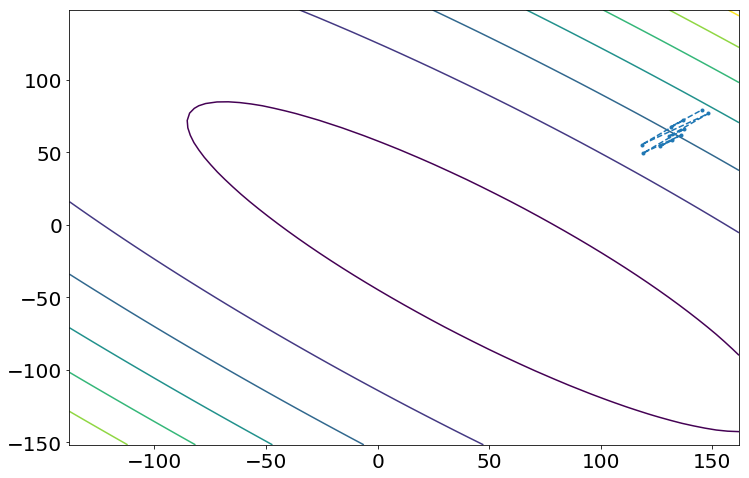

In [103]:
#use vanilla gradient descent
def grad_descent_learning_curves(df, x, y, weights, b0, alpha, ind1, ind2, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] +=120
    W0[ind2 , 5] +=60
    print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 10
    iter = 0

    weight1= np.zeros(max_iter+1)
    weight2 = np.zeros(max_iter+1)
    print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        
        temp = alpha * df(x, W1, y)
        #print(temp.shape)
        #print(temp[ind1+1, 5], temp[ind2+1, 5])
        #print(temp.shape)
        #W1[ind1 +1, 5] -= temp[ind1+1, 5]
        #W1[ind2 +1, 5] -= temp[ind2+1, 5]
        W1 -=temp
        weight1[counter] = W1[ind1+1, 5]
        weight2[counter] = W1[ind2+1, 5]
        counter +=1
        if iter % 100 == 99:
            print("Iter", iter)   
        iter += 1
        #break
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2
    


np.random.seed(0)
alpha = 3

final_weights, weight1, weight2 = grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 1e-4)
print(weight1)
print(weight2)

print(weights[ind1, 5])
plt.figure(figsize=(12, 8))
plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='--', marker='.',)
plt.show()

131.916503118 58.2776393734
(784, 10)
Iter 10
Time taken: 4.06403374671936
[ 125.66267535  129.2146716   133.98926616  117.54027958  120.95644986
  136.08771978  131.53151148  128.45306334  132.07317301  136.07323189]
[ 53.2654463   56.3375627   60.31745853  48.41209014  54.05509036
  69.17741586  68.96779603  68.89720057  73.32002117  77.28273929]


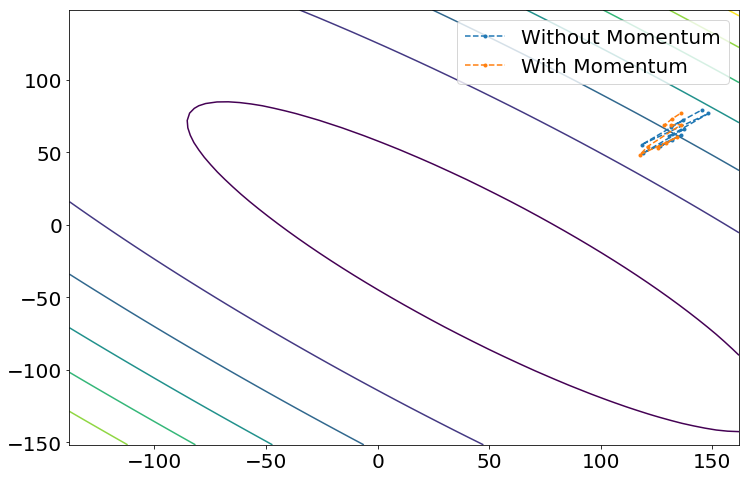

In [104]:
def momemtum_grad_descent_learning_curves(df, x, y, W0, b0, alpha, ind1, ind2, momemtum = 0.9, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] +=120
    W0[ind2 , 5] +=60
    print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 10
    iter = 0
    
    weight1= np.zeros(max_iter)
    weight2 = np.zeros(max_iter)
    print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    
    counter = 0
    new_momentum = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        new_momentum = momemtum*new_momentum + alpha* df(x, W1, y)
        W1 -= new_momentum
        weight1[counter] = W1[ind1+1 , 5]
        weight2[counter] = W1[ind2+1, 5 ]
        counter +=1
        if iter % 100 == 99:
            print("Iter", iter)

        iter += 1
        
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2


np.random.seed(0)
alpha = 3
final_weights, weight3, weight4 = momemtum_grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 0.9, 1e-4)
print(weight3)
print(weight4)

plt.figure(figsize=(12, 8))
plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='--', marker='.', label = "Without Momentum")
plt.plot(weight3, weight4, linestyle='--', marker='.', label = "With Momentum")
plt.legend(numpoints = 1)
plt.show()